# Spotify DJ Recommendations Analysis

In [21]:
# Installing Spotify API
!pip3 install spotipy

In [22]:
# Importing all necessary packages
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity as cosine
from sklearn.preprocessing import StandardScaler

In [23]:
# Essential IDs for authentication 
SPOTIPY_CLIENT_ID = '4547ac9120de4cbba75a19ee6dc3b908'
SPOTIPY_CLIENT_SECRET = '75fa035f5a0b47b7868e69a93ef878b4'

In [24]:
# Authenticating Spotipy with client credentials
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

auth_manager = SpotifyClientCredentials(SPOTIPY_CLIENT_ID,SPOTIPY_CLIENT_SECRET)
sp = spotipy.Spotify(auth_manager=auth_manager)

Search for a song by name and return it's Spotify track ID

In [25]:
# Searching for a song with a user input and retrieving the Spotify ID from the JSON format
def search_song_id(song_name):
    results = sp.search(q=song_name, limit=1)
    if results['tracks']['items']:
        return results['tracks']['items'][0]['id']
    else:
        print(f"Song '{song_name}' not found.")
        return None

Get song recommendations with the Spotify API and it's built-in "recommendations" function

In [26]:
# Function to find recommended tracks based on a seed track ID
def get_recommended_tracks(seed_track_id, limit=10):
    # Spotify's API recommendation function
    results = sp.recommendations(seed_tracks=[seed_track_id], limit=limit)
    recommended_tracks = results['tracks']
    return recommended_tracks

See what similar songs the API comes up with

In [27]:
# This is the main function that allows users to input a track name and get recommendations from the recommendations function in the above cell

def main():
    # User input
    song_name = input("Enter a song name (Artist - Song): ")

    # Searching for the song and get its ID
    seed_track_id = search_song_id(song_name)

    # Initialising an empty list to store recommended tracks
    recommended_tracks = []  

    if seed_track_id:
        # Fetching recommended tracks based on the seed track ID
        recommended_tracks = get_recommended_tracks(seed_track_id)

        # Printing the recommended tracks
        print("\nTop 10 Recommended Songs:")
        for index, track in enumerate(recommended_tracks, start=1):
            artists = ', '.join([artist['name'] for artist in track['artists']])
            print(f"{index}. {track['name']} - {artists}")

    # Storing the seed track and recommended tracks to use in later cells
    return seed_track_id, song_name, recommended_tracks 

if __name__ == "__main__":
    seed_track_id, song_name, recommended_tracks = main()



Top 10 Recommended Songs:
1. Keepin' It Real - Kobe JT
2. The Phonk Club Underground - Yuri Petrovski
3. Bricks - Violet Chinchilla
4. Dubydoo - the eternal offended
5. Final Rule - Stones Taro
6. 2 Yr Town - Josh Wink Interpretation - Ardalan, Farsight, Josh Wink
7. LOVE SENSATION - bullet tooth
8. What About The DJ? - Silva Bumpa
9. Vanity (I Want You) - Jack Blom
10. Platforming - ØZ


Now let's see what audio features when can access from Spotify

In [28]:
track_ids = [track['id'] for track in recommended_tracks]

# Finding audio features for all recommended tracks
features = pd.DataFrame(sp.audio_features(track_ids))

# Displaying the available features
features.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature'],
      dtype='object')

Let's see what features characterise each of these findings

In [29]:
# Filtering the features and removing unnecessary ones like uri and analysis_url
my_features = ['danceability', 'energy', 'key', 
            'loudness', 'mode', 'speechiness', 
            'acousticness', 'instrumentalness', 
            'liveness', 'valence', 'tempo', 'duration_ms', 
            'time_signature']

# Creating labels by combining artist name and track name
labels = [track['artists'][0]['name'] + ' - ' + track['name'] for track in recommended_tracks]

# Labelling the rows with track name and artist
features.index = labels

# Applying the selected features
features = features[my_features]

features


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
Kobe JT - Keepin' It Real,0.839,0.938,9,-6.003,0,0.0556,0.000108,0.291,0.1170,0.968,132.023,267955,4
Yuri Petrovski - The Phonk Club Underground,0.812,0.861,11,-2.171,0,0.0636,0.001580,0.901,0.1240,0.759,128.019,76000,4
Violet Chinchilla - Bricks,0.865,0.530,4,-7.362,1,0.0621,0.033800,0.213,0.1180,0.371,117.976,179128,4
the eternal offended - Dubydoo,0.707,0.823,5,-7.701,1,0.3460,0.012200,0.336,0.3530,0.320,72.523,155115,4
Stones Taro - Final Rule,0.747,0.862,0,-6.666,1,0.0398,0.002540,0.877,0.6500,0.155,131.994,267146,4
Ardalan - 2 Yr Town - Josh Wink Interpretation,0.784,0.821,11,-7.672,1,0.0611,0.001800,0.855,0.0777,0.685,133.013,227368,4
bullet tooth - LOVE SENSATION,0.532,0.943,7,-6.058,1,0.1680,0.016900,0.630,0.2310,0.353,149.966,160500,4
Silva Bumpa - What About The DJ?,0.835,0.974,11,-4.280,0,0.1310,0.000457,0.878,0.0808,0.868,138.011,256000,4
Jack Blom - Vanity (I Want You),0.535,0.940,11,-6.740,0,0.0397,0.004290,0.688,0.1120,0.149,137.006,238248,4
ØZ - Platforming,0.804,0.647,6,-8.352,0,0.1010,0.121000,0.528,0.1230,0.383,133.988,211343,4


In [30]:
# Finding audio features for the seed track
seed_features = sp.audio_features(seed_track_id)[0]

seed_features

{'danceability': 0.726,
 'energy': 0.729,
 'key': 1,
 'loudness': -11.082,
 'mode': 1,
 'speechiness': 0.0836,
 'acousticness': 0.00427,
 'instrumentalness': 0.891,
 'liveness': 0.0456,
 'valence': 0.351,
 'tempo': 133.961,
 'type': 'audio_features',
 'id': '1UZT1j1rYTuYCvJ6PH6oEj',
 'uri': 'spotify:track:1UZT1j1rYTuYCvJ6PH6oEj',
 'track_href': 'https://api.spotify.com/v1/tracks/1UZT1j1rYTuYCvJ6PH6oEj',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/1UZT1j1rYTuYCvJ6PH6oEj',
 'duration_ms': 236441,
 'time_signature': 4}

In [31]:
# Refining the features even more to ones useful for DJing
my_features = ['danceability', 'energy', 'key', 
            'loudness', 'mode', 
            'tempo', 'duration_ms']


seed_features = pd.DataFrame([seed_features])

features = pd.concat([seed_features, features], ignore_index=True)

features = features[my_features]

# Create labels combining artist name and track name
seed_label = [song_name]
recommended_labels = [track['artists'][0]['name'] + ' - ' + track['name'] for track in recommended_tracks]
labels = seed_label + recommended_labels

#Label dataframe rows with track name and artist
features.index = labels

features


,danceability,energy,key,loudness,mode,tempo,duration_ms
Fonzo - 121,0.726,0.729,1,-11.082,1,133.961,236441
Kobe JT - Keepin' It Real,0.839,0.938,9,-6.003,0,132.023,267955
Yuri Petrovski - The Phonk Club Underground,0.812,0.861,11,-2.171,0,128.019,76000
Violet Chinchilla - Bricks,0.865,0.530,4,-7.362,1,117.976,179128
the eternal offended - Dubydoo,0.707,0.823,5,-7.701,1,72.523,155115
Stones Taro - Final Rule,0.747,0.862,0,-6.666,1,131.994,267146
Ardalan - 2 Yr Town - Josh Wink Interpretation,0.784,0.821,11,-7.672,1,133.013,227368
bullet tooth - LOVE SENSATION,0.532,0.943,7,-6.058,1,149.966,160500
Silva Bumpa - What About The DJ?,0.835,0.974,11,-4.280,0,138.011,256000
Jack Blom - Vanity (I Want You),0.535,0.940,11,-6.740,0,137.006,238248


Calculating cosine similarities based on audio features

In [32]:
# Getting subset
subset_features = features[my_features]
# Standardising
scaled_features = StandardScaler().fit_transform(subset_features)
# Gettting cosine distances
similarities = cosine(scaled_features)
# Visualising the results 
similarities = pd.DataFrame(similarities, columns = features.index, index = features.index)
similarities.style.background_gradient(cmap='Greens')

,Fonzo - 121,Kobe JT - Keepin' It Real,Yuri Petrovski - The Phonk Club Underground,Violet Chinchilla - Bricks,the eternal offended - Dubydoo,Stones Taro - Final Rule,Ardalan - 2 Yr Town - Josh Wink Interpretation,bullet tooth - LOVE SENSATION,Silva Bumpa - What About The DJ?,Jack Blom - Vanity (I Want You),ØZ - Platforming
Fonzo - 121,1.000000,-0.443392,-0.826882,0.436129,0.122352,0.595224,0.076342,-0.029366,-0.711990,-0.321515,0.327979
Kobe JT - Keepin' It Real,-0.443392,1.000000,0.097880,-0.522647,-0.488188,-0.097994,0.049544,-0.429381,0.917889,0.280325,0.071341
Yuri Petrovski - The Phonk Club Underground,-0.826882,0.097880,1.000000,-0.116403,-0.045026,-0.638030,-0.258683,0.066687,0.382152,0.006201,-0.117928
Violet Chinchilla - Bricks,0.436129,-0.522647,-0.116403,1.000000,0.317724,0.138416,0.069891,-0.461408,-0.602853,-0.826725,0.483735
the eternal offended - Dubydoo,0.122352,-0.488188,-0.045026,0.317724,1.000000,0.011056,-0.138243,-0.142920,-0.551782,-0.313220,-0.260460
Stones Taro - Final Rule,0.595224,-0.097994,-0.638030,0.138416,0.011056,1.000000,-0.165700,0.057947,-0.244268,-0.318781,-0.179951
Ardalan - 2 Yr Town - Josh Wink Interpretation,0.076342,0.049544,-0.258683,0.069891,-0.138243,-0.165700,1.000000,-0.000616,0.084695,-0.067479,-0.184305
bullet tooth - LOVE SENSATION,-0.029366,-0.429381,0.066687,-0.461408,-0.142920,0.057947,-0.000616,1.000000,-0.188785,0.486841,-0.584082
Silva Bumpa - What About The DJ?,-0.711990,0.917889,0.382152,-0.602853,-0.551782,-0.244268,0.084695,-0.188785,1.000000,0.353301,-0.140061
Jack Blom - Vanity (I Want You),-0.321515,0.280325,0.006201,-0.826725,-0.313220,-0.318781,-0.067479,0.486841,0.353301,1.000000,-0.197368


The dark green colour indicates that the song is most similar to another hence why each song is 100% similar to itself. This plot helps us understand how songs compare to each other and to the seed song.

Top N Recommendation

In [33]:
track = song_name

# How many tracks to recommend
n = 10

top_N = similarities.sort_values(by = track, ascending=False)[track].index[1:n+1]

# Printing the top N recommendations
print("\nTop 10 N Recommendations:")
for index, track_name in enumerate(top_N, start=1):
    print(f"{index}. {track_name}")


Top 10 N Recommendations:
1. Stones Taro - Final Rule
2. Violet Chinchilla - Bricks
3. ØZ - Platforming
4. the eternal offended - Dubydoo
5. Ardalan - 2 Yr Town - Josh Wink Interpretation
6. bullet tooth - LOVE SENSATION
7. Jack Blom - Vanity (I Want You)
8. Kobe JT - Keepin' It Real
9. Silva Bumpa - What About The DJ?
10. Yuri Petrovski - The Phonk Club Underground


Are these results different to the Spotify Recommendations we got earlier?

In [34]:
# Printing the recommended tracks
print("\nTop 10 Spotify Recommendations:")
for index, track in enumerate(recommended_tracks, start=1):
    artists = ', '.join([artist['name'] for artist in track['artists']])
    print(f"{index}. {artists} - {track['name']}")


Top 10 Spotify Recommendations:
1. Kobe JT - Keepin' It Real
2. Yuri Petrovski - The Phonk Club Underground
3. Violet Chinchilla - Bricks
4. the eternal offended - Dubydoo
5. Stones Taro - Final Rule
6. Ardalan, Farsight, Josh Wink - 2 Yr Town - Josh Wink Interpretation
7. bullet tooth - LOVE SENSATION
8. Silva Bumpa - What About The DJ?
9. Jack Blom - Vanity (I Want You)
10. ØZ - Platforming


As we can see, the results from the first recommendation system are not the same from the results we got when analysing the song features.

This is because the Spotify Recommendations algorithm takes different factors into account and analyses users history to guarantee a further personalised experience for the user. This is great when browsing for different music and making new findings but it is rather unhelpful for DJs. Having access to the song features is valuable as we can refine the results to specific mixing needs (eg. BPM, key, length etc.).

Let's now visualise them with a Principal Component Analysis (PCA) to visually see how similar the tracks are based on the features we extracted

<Figure size 800x800 with 0 Axes>

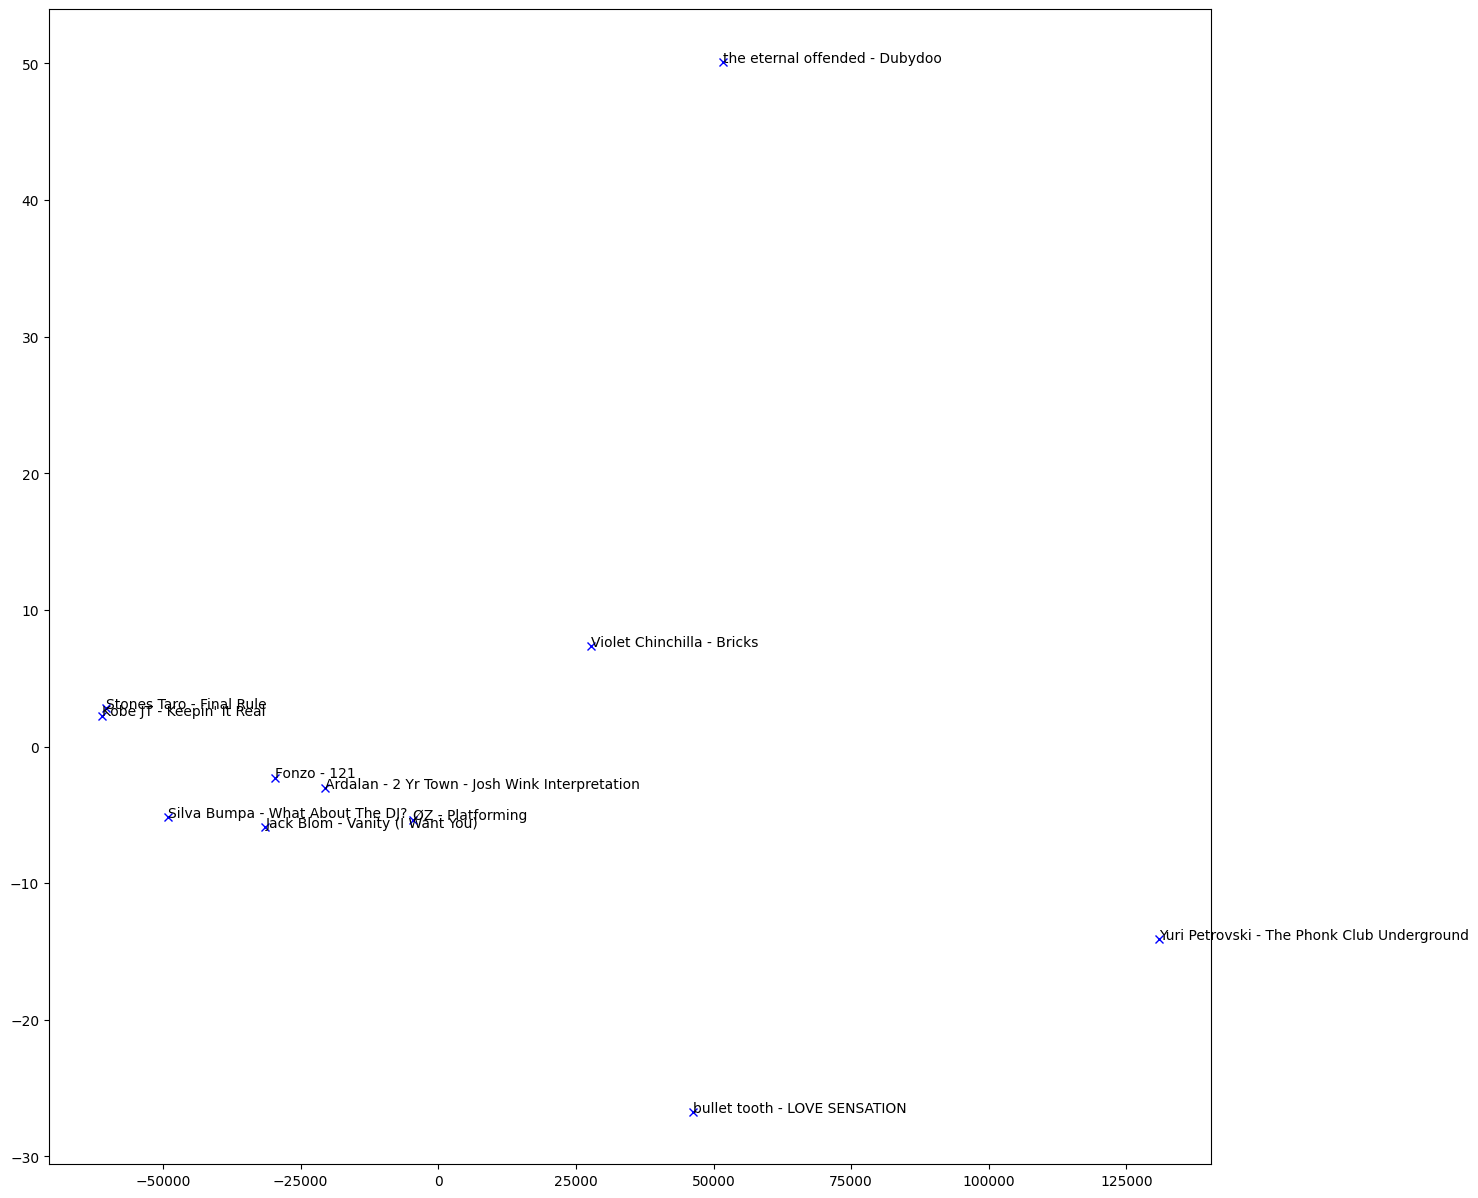

In [35]:
num_dimensions = 2 

# Reducing dimensions for PCA
pca = PCA(n_components=num_dimensions)
reduced_features = pca.fit_transform(features)

# Plot
plt.figure(figsize=(8, 8))
fig, ax = plt.subplots(figsize=(15,15))
x = reduced_features[:,0]
y = reduced_features[:,1]
ax.plot(x, y, "bx")
annotations = features.index  # Use the index from the features DataFrame
for i, label in enumerate(annotations):
    ax.annotate(label, (x[i], y[i]), alpha=1)

This shows not only what songs are most similar to the seed track (by seeing how close they are to the original seed) but also what songs share similar features by noticing how they cluster together in the visualisation

At this point I wanted to view and compare similarities with the Spotify recommended tracks in a similar fashion. Unfortunately though, after viewing the outputted data as a Dataframe I noticed that the wasn't a parameter that suggested a similarity score in the Spotipy recommendations function (as can be seen below).

In [36]:
# num_dimensions = 2 

recommended_tracks = pd.DataFrame(recommended_tracks)

recommended_tracks

# numeric_features = recommended_tracks.select_dtypes(include=[np.number])

# # Handle missing values by filling or dropping them
# numeric_features = numeric_features.dropna()

# # Number of dimensions for PCA
# num_dimensions = 2

# # Reducing dimensions for PCA
# pca = PCA(n_components=num_dimensions)
# reduced_features = pca.fit_transform(numeric_features)

# # Plot
# plt.figure(figsize=(8, 8))
# fig, ax = plt.subplots(figsize=(15,15))
# x = reduced_features[:,0]
# y = reduced_features[:,1]
# ax.plot(x, y, "bx")
# annotations = features.index 
# for i, label in enumerate(annotations):
#     ax.annotate(label, (x[i], y[i]), alpha=1)

,album,artists,available_markets,disc_number,duration_ms,explicit,external_ids,external_urls,href,id,is_local,name,popularity,preview_url,track_number,type,uri
0,"{'album_type': 'SINGLE', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,267954,False,{'isrc': 'UKN6K2300150'},{'spotify': 'https://open.spotify.com/track/3x...,https://api.spotify.com/v1/tracks/3xCt6bdvVDmh...,3xCt6bdvVDmhDEJ6l8QuyP,False,Keepin' It Real,4,https://p.scdn.co/mp3-preview/6cef7fd0a3e0216b...,1,track,spotify:track:3xCt6bdvVDmhDEJ6l8QuyP
1,"{'album_type': 'ALBUM', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,76000,False,{'isrc': 'GX8KD2323669'},{'spotify': 'https://open.spotify.com/track/5x...,https://api.spotify.com/v1/tracks/5xCZdRe4fuCE...,5xCZdRe4fuCE06YAHRSHkw,False,The Phonk Club Underground,21,https://p.scdn.co/mp3-preview/6ab063e3cd00224e...,12,track,spotify:track:5xCZdRe4fuCE06YAHRSHkw
2,"{'album_type': 'ALBUM', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,179128,False,{'isrc': 'GBMJG2324692'},{'spotify': 'https://open.spotify.com/track/0P...,https://api.spotify.com/v1/tracks/0Pe6eCsnT5X2...,0Pe6eCsnT5X2BEpHKXT5Uk,False,Bricks,12,https://p.scdn.co/mp3-preview/645089e6c1202611...,5,track,spotify:track:0Pe6eCsnT5X2BEpHKXT5Uk
3,"{'album_type': 'SINGLE', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,155115,False,{'isrc': 'QZ8252035193'},{'spotify': 'https://open.spotify.com/track/6h...,https://api.spotify.com/v1/tracks/6hfSNvOgcqXE...,6hfSNvOgcqXEmbbknDkklT,False,Dubydoo,14,https://p.scdn.co/mp3-preview/e926ab6e2b1c2588...,1,track,spotify:track:6hfSNvOgcqXEmbbknDkklT
4,"{'album_type': 'SINGLE', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,267146,False,{'isrc': 'AUFF02300496'},{'spotify': 'https://open.spotify.com/track/7m...,https://api.spotify.com/v1/tracks/7mQtkS5leqTF...,7mQtkS5leqTFbgMa4qUAtJ,False,Final Rule,13,https://p.scdn.co/mp3-preview/73675e2dbb21b017...,1,track,spotify:track:7mQtkS5leqTFbgMa4qUAtJ
5,"{'album_type': 'SINGLE', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,227368,False,{'isrc': 'UKWUR2400003'},{'spotify': 'https://open.spotify.com/track/3M...,https://api.spotify.com/v1/tracks/3MxMvDOvddnw...,3MxMvDOvddnwWTyz2Kyph1,False,2 Yr Town - Josh Wink Interpretation,7,https://p.scdn.co/mp3-preview/3df9e524f6b19c04...,3,track,spotify:track:3MxMvDOvddnwWTyz2Kyph1
6,"{'album_type': 'SINGLE', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,160500,False,{'isrc': 'GBM6E2400014'},{'spotify': 'https://open.spotify.com/track/2c...,https://api.spotify.com/v1/tracks/2cKRqAUIkIgR...,2cKRqAUIkIgRpitV9IY5Ii,False,LOVE SENSATION,20,https://p.scdn.co/mp3-preview/85d3d74a8c038b7e...,4,track,spotify:track:2cKRqAUIkIgRpitV9IY5Ii
7,"{'album_type': 'SINGLE', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,256000,False,{'isrc': 'US38Y2308535'},{'spotify': 'https://open.spotify.com/track/1q...,https://api.spotify.com/v1/tracks/1qv0AJdAPccm...,1qv0AJdAPccmzNXXGekffR,False,What About The DJ?,18,https://p.scdn.co/mp3-preview/7fe433cff634f71b...,1,track,spotify:track:1qv0AJdAPccmzNXXGekffR
8,"{'album_type': 'SINGLE', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,238248,False,{'isrc': 'CAQOI2305627'},{'spotify': 'https://open.spotify.com/track/5A...,https://api.spotify.com/v1/tracks/5ADtZfwsBkVt...,5ADtZfwsBkVtSGBB0kU5W1

Instead I decided to analyse and visualise the different extracted features to see if certain features have a bigger impact in the cosine similarity calculation

C:\Users\marce\AppData\Local\Temp\ipykernel_32708\2158801304.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(label, (i, danceability[i]), textcoords="offset points", xytext=(5,0), ha='right')


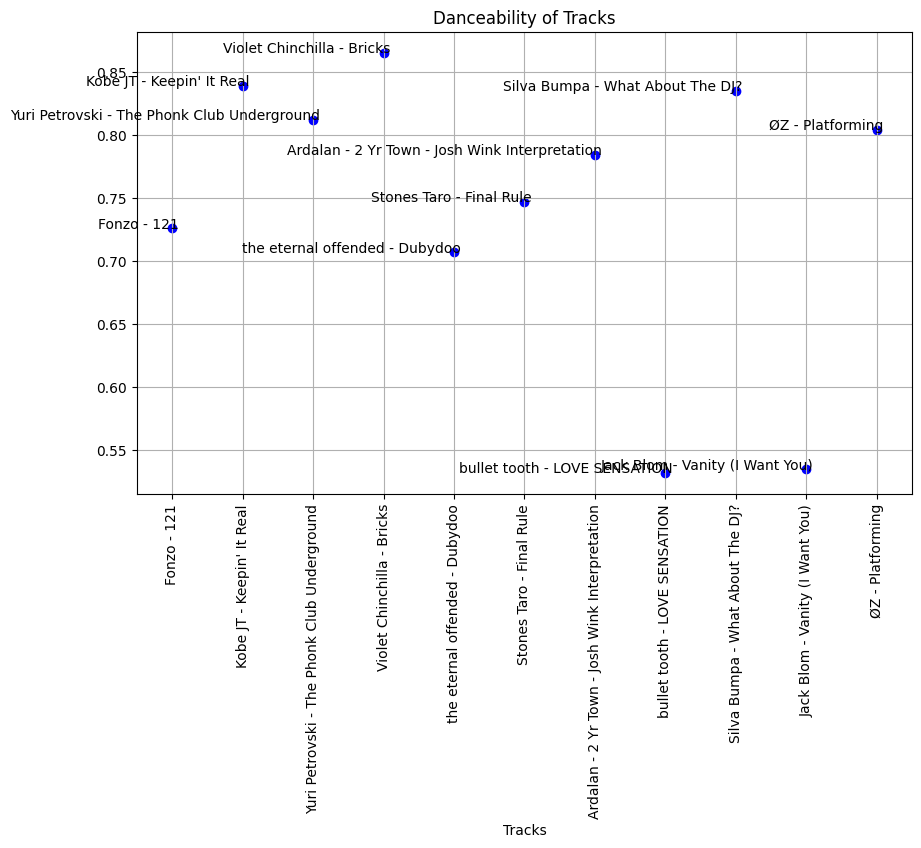

In [37]:
# Extracting the "danceability" feature
danceability = features['danceability']

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(danceability.index, danceability, color='blue')

# Labelling each point to the right of the marker
for i, label in enumerate(danceability.index):
    plt.annotate(label, (i, danceability[i]), textcoords="offset points", xytext=(5,0), ha='right')

plt.title('Danceability of Tracks')
plt.xlabel('Tracks')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

C:\Users\marce\AppData\Local\Temp\ipykernel_32708\4090594460.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(label, (i, key[i]), textcoords="offset points", xytext=(5,0), ha='right')


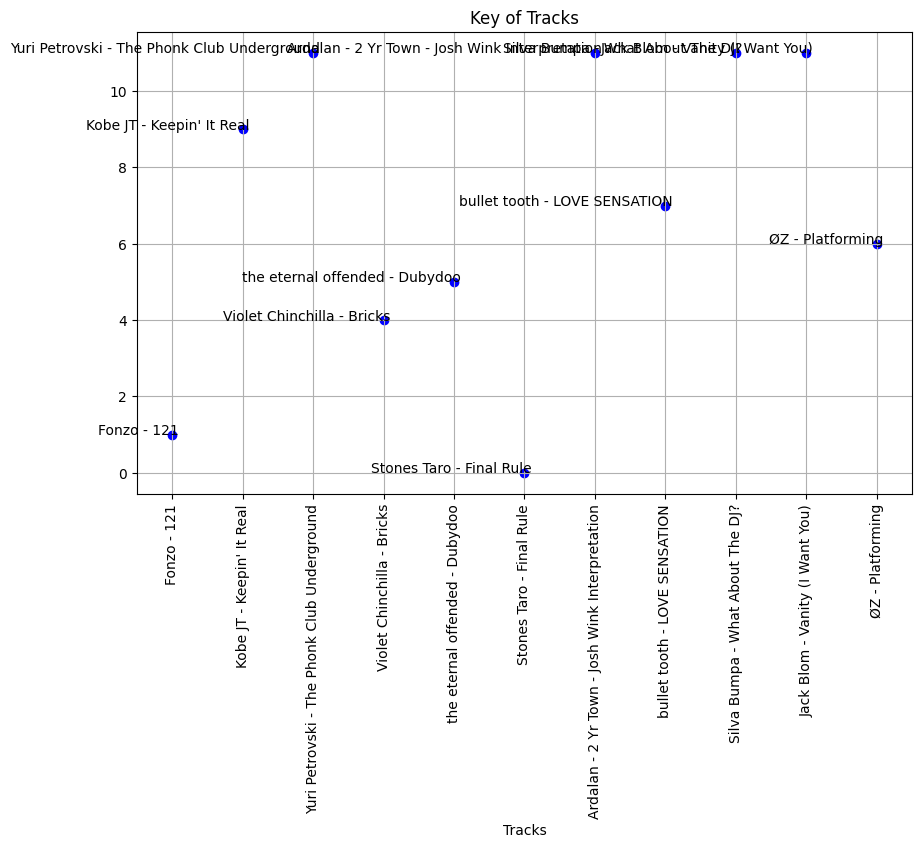

In [38]:
# Extracting the "key" feature
key = features['key']

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(danceability.index, key, color='blue')

# Labelling each point to the right of the marker
for i, label in enumerate(key.index):
    plt.annotate(label, (i, key[i]), textcoords="offset points", xytext=(5,0), ha='right')

plt.title('Key of Tracks')
plt.xlabel('Tracks')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

C:\Users\marce\AppData\Local\Temp\ipykernel_32708\2917357830.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(label, (i, duration[i]), textcoords="offset points", xytext=(5,0), ha='right')


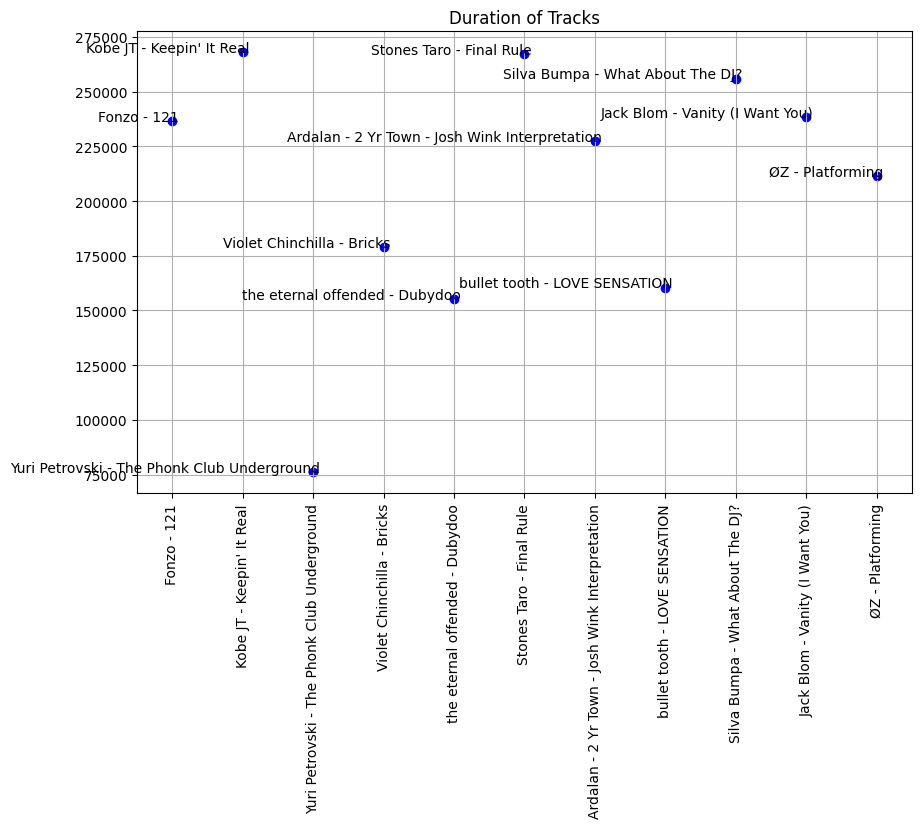

In [39]:
# Extracting the "duration" feature
duration = features['duration_ms']

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(danceability.index, duration, color='blue')

# Labelling each point to the right of the marker
for i, label in enumerate(duration.index):
    plt.annotate(label, (i, duration[i]), textcoords="offset points", xytext=(5,0), ha='right')

plt.title('Duration of Tracks')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

As we can see, different features have different influences in the cosine similarity calculation and songs that are considerably "close" in the duration feature don't seem to have the same overall score to songs with a higher "deanceability" feature.

This is also helpful to allow users to filter and find tracks that are most similar from one another and to highlight what features they share.